Apresentar um jupyter notebook atendendo os seguintes itens:

1. Filtrar os dados para selecionar apenas aqueles referentes ao estado do Piauí. Se uma cidade possui mais de 1 amostra, selecionar aquela mais recente (nota: as datas estão em ordem decrescente);
2. Plotar um mapa com a localização e número de casos;
3. Indicar o número de amostras, atributos e dados faltantes (se existir) do conjunto de dados;
4. Apresentar as estatísticas descritivas dos atributos não categóricos;
5. Apresentar os histogramas dos atributos não categóricos;
6. Capturar as latitudes e longitudes para cada 1 dos municípios presentes na base de dados e adicionar as colunas latitude e longitude nos dados;
7. Apresentar um gráfico da latitude x longitude, onde cada amostra será representada por um círculo e quanto maior o valor do campo estimated_population, maior o raio do círculo que representa aquela amostra. Já a cor representa a taxa de mortalidade (death_rate), quão maior esse índice, mais próximo do vermelho;
8. Calcular a matriz de correlação;
9. Verificar a correlação entre o atributo death_rate e os demais atributos não categóricos;

## Importando as bibliotecas

In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt 
import folium
from folium.plugins import MarkerCluster

## Aquisição dos dados

In [3]:
data = pd.read_csv('caso.csv')

In [4]:
data.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2022-03-27,AP,NaN,state,160328,2122,734,True,845731.0,861773.0,16.0,18604.43527,0.0132
1,2022-03-26,AP,NaN,state,160321,2122,733,False,845731.0,861773.0,16.0,18603.62300,0.0132
2,2022-03-25,AP,NaN,state,160314,2122,732,False,845731.0,861773.0,16.0,18602.81072,0.0132
3,2022-03-24,AP,NaN,state,160301,2122,731,False,845731.0,861773.0,16.0,18601.30220,0.0132
4,2022-03-23,AP,NaN,state,160288,2122,730,False,845731.0,861773.0,16.0,18599.79368,0.0132


In [5]:
data.shape

(2838003, 13)

# Ponto #1

In [6]:
data_piaui = data[data['state'] == 'PI']

In [7]:
cidades = data_piaui[(data_piaui['is_last'] == True)&(data_piaui['place_type'] == 'city')]

In [8]:
data_piaui.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151342 entries, 1095342 to 1246683
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   date                            151342 non-null  object 
 1   state                           151342 non-null  object 
 2   city                            150604 non-null  object 
 3   place_type                      151342 non-null  object 
 4   confirmed                       151342 non-null  int64  
 5   deaths                          151342 non-null  int64  
 6   order_for_place                 151342 non-null  int64  
 7   is_last                         151342 non-null  bool   
 8   estimated_population_2019       151342 non-null  float64
 9   estimated_population            151342 non-null  float64
 10  city_ibge_code                  151342 non-null  float64
 11  confirmed_per_100k_inhabitants  151123 non-null  float64
 12  death_rat

In [9]:
list_cities = cidades['city'].unique()

In [10]:
list_cities

array(['Acauã', 'Agricolândia', 'Alagoinha do Piauí', 'Alegrete do Piauí',
       'Alto Longá', 'Altos', 'Alvorada do Gurguéia', 'Amarante',
       'Angical do Piauí', 'Antônio Almeida', 'Anísio de Abreu',
       'Aroazes', 'Aroeiras do Itaim', 'Arraial', 'Assunção do Piauí',
       'Avelino Lopes', 'Baixa Grande do Ribeiro', "Barra D'Alcântara",
       'Barras', 'Barreiras do Piauí', 'Barro Duro', 'Batalha',
       'Bela Vista do Piauí', 'Belém do Piauí', 'Beneditinos',
       'Bertolínia', 'Betânia do Piauí', 'Boa Hora', 'Bocaina',
       'Bom Jesus', 'Bom Princípio do Piauí', 'Bonfim do Piauí',
       'Boqueirão do Piauí', 'Brasileira', 'Brejo do Piauí',
       'Buriti dos Lopes', 'Buriti dos Montes', 'Cabeceiras do Piauí',
       'Cajazeiras do Piauí', 'Cajueiro da Praia',
       'Caldeirão Grande do Piauí', 'Campinas do Piauí',
       'Campo Alegre do Fidalgo', 'Campo Grande do Piauí',
       'Campo Largo do Piauí', 'Campo Maior', 'Canavieira',
       'Canto do Buriti', 'Capitão G

In [11]:
len(list_cities)

224

In [12]:
data_piaui.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151342 entries, 1095342 to 1246683
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   date                            151342 non-null  object 
 1   state                           151342 non-null  object 
 2   city                            150604 non-null  object 
 3   place_type                      151342 non-null  object 
 4   confirmed                       151342 non-null  int64  
 5   deaths                          151342 non-null  int64  
 6   order_for_place                 151342 non-null  int64  
 7   is_last                         151342 non-null  bool   
 8   estimated_population_2019       151342 non-null  float64
 9   estimated_population            151342 non-null  float64
 10  city_ibge_code                  151342 non-null  float64
 11  confirmed_per_100k_inhabitants  151123 non-null  float64
 12  death_rat

In [13]:
cidades.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
1096080,2022-03-26,PI,Acauã,city,228,2,658,True,7084.0,7102.0,2200053.0,3210.36328,0.0088
1096738,2022-03-26,PI,Agricolândia,city,829,10,650,True,5139.0,5131.0,2200103.0,16156.69460,0.0121
1097388,2022-03-26,PI,Alagoinha do Piauí,city,402,13,664,True,7651.0,7665.0,2200251.0,5244.61840,0.0323
1098052,2022-03-26,PI,Alegrete do Piauí,city,553,9,646,True,4915.0,4918.0,2200277.0,11244.40830,0.0163
1098698,2022-03-26,PI,Alto Longá,city,858,15,680,True,14304.0,14339.0,2200301.0,5983.68087,0.0175


## Capturando as latitudes e longitudes com openstreetmaps

In [14]:
#pode demorar um pouco
latitudes = []
longitudes = []
for city in list_cities:
    request = 'https://nominatim.openstreetmap.org/search?city='+city+'&state=Piaui&format=json'
    response = requests.get(request)
    response_data = response.json()[0]
    
    latitude = float(response_data["lat"])
    longitude = float(response_data["lon"])
    latitudes.append(latitude)
    longitudes.append(longitude)

In [15]:
len(latitudes)

224

In [16]:
latitudes

[-8.3303906,
 -5.7967843,
 -7.0090952,
 -7.2440138,
 -5.2549051,
 -5.0393915,
 -8.4465288,
 -6.2459374,
 -6.0872666,
 -7.2186016,
 -9.183959,
 -6.1109109,
 -7.2797031,
 -6.6541632,
 -5.8610212,
 -10.1346855,
 -7.862861,
 -6.5209258,
 -4.1547731,
 -9.9224524,
 -5.8180139,
 -4.022391,
 -7.9716353,
 -7.3767305,
 -5.4565671,
 -7.6372159,
 -8.133786350000001,
 -4.37397505,
 -6.9445939,
 -9.0711644,
 -3.1912777,
 -9.1648678,
 -4.4850148,
 -4.131182,
 -8.207583,
 -3.1776723,
 -5.3136171,
 -4.4424124,
 -6.794271,
 -2.9289603,
 -7.320028199999999,
 -7.6593687,
 -8.3753852,
 -7.1327559,
 -3.8104731,
 -4.8339574,
 -7.6924041,
 -8.1112473,
 -8.4954657,
 -4.4584198,
 -9.2804898,
 -3.4760094,
 -7.7331063,
 -5.3230426,
 -3.3931229,
 -3.4691882,
 -4.5553648,
 -3.59964,
 -5.0927005,
 -8.183697,
 -7.2320268,
 -7.8774025,
 -8.8252316,
 -10.4401356,
 -10.6525894,
 -8.8163934,
 -10.0349005,
 -8.7324968,
 -7.888558,
 -5.6190404,
 -5.3640643,
 -9.3413101,
 -6.9644926,
 -9.0009167,
 -4.2544732,
 -6.2032654,
 

In [17]:
len(longitudes)

224

In [18]:
longitudes

[-40.98418762825648,
 -42.6605131,
 -40.939675,
 -40.8602296,
 -42.2072388,
 -42.4611694,
 -43.8655915,
 -42.8476238,
 -42.7366138,
 -44.1950248,
 -43.049115,
 -41.7881792,
 -41.5629681,
 -42.5335332,
 -41.0485091,
 -43.9489525,
 -45.2113289,
 -42.1071089,
 -42.45039861701474,
 -45.4763776,
 -42.5106589,
 -42.0780926,
 -41.8715061,
 -40.9712156,
 -42.3605061,
 -43.9540611,
 -40.76046787508793,
 -42.12671540996983,
 -41.3224599,
 -44.3583926,
 -41.6430185,
 -42.8734415,
 -42.1095161,
 -41.7824969,
 -42.8359849,
 -41.8707444,
 -41.0971256,
 -42.30490573535906,
 -42.3935024,
 -41.3381617,
 -40.62805664474844,
 -41.8814875,
 -41.8364191,
 -41.0381164,
 -42.6288333,
 -42.1739786,
 -43.7190063,
 -42.944844,
 -41.8169342,
 -41.9415301,
 -43.3284924,
 -41.8412188,
 -40.9883665,
 -41.5546185,
 -41.84425919266597,
 -41.555851,
 -41.9722429,
 -41.444741,
 -42.2052489,
 -43.793999,
 -42.1777122,
 -41.5961417,
 -42.4782948,
 -45.1627472,
 -45.1847405,
 -44.2211062,
 -44.3033114,
 -44.64851779660000

# Ponto #2

In [19]:
dicionario = {
    'city': list_cities,
    'latitude': latitudes,
    'longitude': longitudes,
    'confirmed': cidades['confirmed'],
}

df = pd.DataFrame(dicionario)


In [20]:
df

,city,latitude,longitude,confirmed
1096080,Acauã,-8.330391,-40.984188,228
1096738,Agricolândia,-5.796784,-42.660513,829
1097388,Alagoinha do Piauí,-7.009095,-40.939675,402
1098052,Alegrete do Piauí,-7.244014,-40.860230,553
1098698,Alto Longá,-5.254905,-42.207239,858
...,...,...,...,...
1243291,Vila Nova do Piauí,-7.142922,-40.937856,349
1243980,Várzea Branca,-9.237188,-42.964378,204
1244646,Várzea Grande,-6.546083,-42.248040,561
1245343,Wall Ferraz,-7.233920,-41.911407,335


In [21]:
m = folium.Map(zoom_start=3)

marker_cluster = MarkerCluster().add_to(m)

for _, x in df.iterrows():
    folium.Marker(
        location=[x['latitude'], x['longitude']],
        popup= x['city']+': '+str(x['confirmed'])+' casos',
        icon=folium.Icon(color="green"),
    ).add_to(m)  

m

### Ponto #3
Indicar o número de amostras, atributos e dados faltantes (se existir) do conjunto de dados


In [22]:
data_piaui.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151342 entries, 1095342 to 1246683
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   date                            151342 non-null  object 
 1   state                           151342 non-null  object 
 2   city                            150604 non-null  object 
 3   place_type                      151342 non-null  object 
 4   confirmed                       151342 non-null  int64  
 5   deaths                          151342 non-null  int64  
 6   order_for_place                 151342 non-null  int64  
 7   is_last                         151342 non-null  bool   
 8   estimated_population_2019       151342 non-null  float64
 9   estimated_population            151342 non-null  float64
 10  city_ibge_code                  151342 non-null  float64
 11  confirmed_per_100k_inhabitants  151123 non-null  float64
 12  death_rat

### Ponto #4
Apresentar as estatísticas descritivas dos atributos não categóricos;


In [23]:
data_piaui.describe()

,confirmed,deaths,order_for_place,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
count,151342.000000,151342.000000,151342.000000,1.513420e+05,1.513420e+05,1.513420e+05,151123.000000,151342.000000
mean,1908.357905,40.989448,337.389575,3.109262e+04,3.117145e+04,2.194941e+06,4934.037683,0.028821
std,17104.607265,371.748592,195.140716,2.350485e+05,2.356595e+05,1.536849e+05,4386.176839,0.064161
min,0.000000,0.000000,1.000000,1.246000e+03,1.242000e+03,2.200000e+01,0.091420,0.000000
25%,90.000000,2.000000,169.000000,4.532000e+03,4.530000e+03,2.202653e+06,1522.754800,0.010000
50%,240.000000,5.000000,337.000000,6.392000e+03,6.406000e+03,2.205540e+06,3808.752030,0.018500
75%,569.000000,12.000000,505.000000,1.093600e+04,1.096400e+04,2.208650e+06,7219.682970,0.030100
max,367515.000000,7721.000000,738.000000,3.273227e+06,3.281480e+06,2.211704e+06,27500.000000,1.000000


# Ponto #5

# Apresentar os histogramas dos atributos não categóricos;

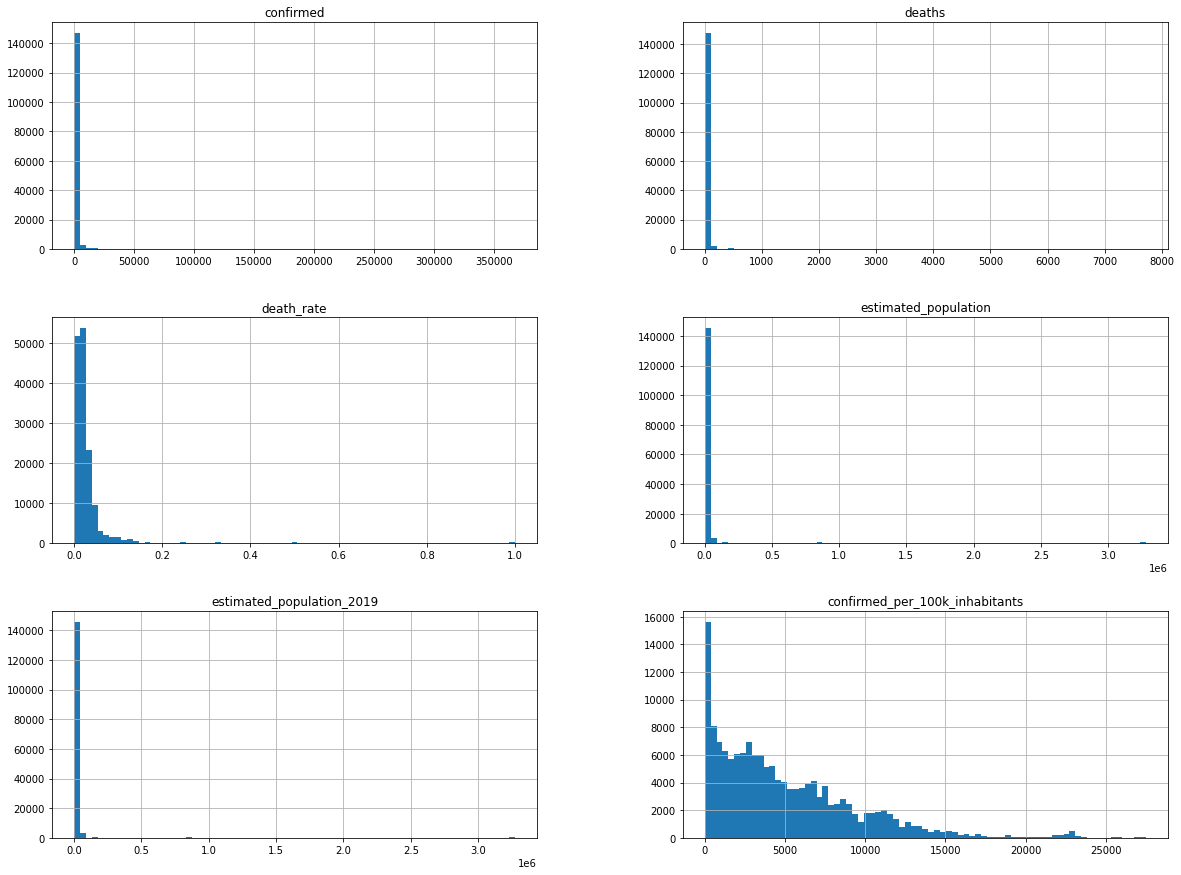

In [24]:
data_piaui.hist(['confirmed', 'deaths', 'death_rate', 'estimated_population', 'estimated_population_2019', 'confirmed_per_100k_inhabitants'], bins=75, figsize=(20,15))
plt.show()

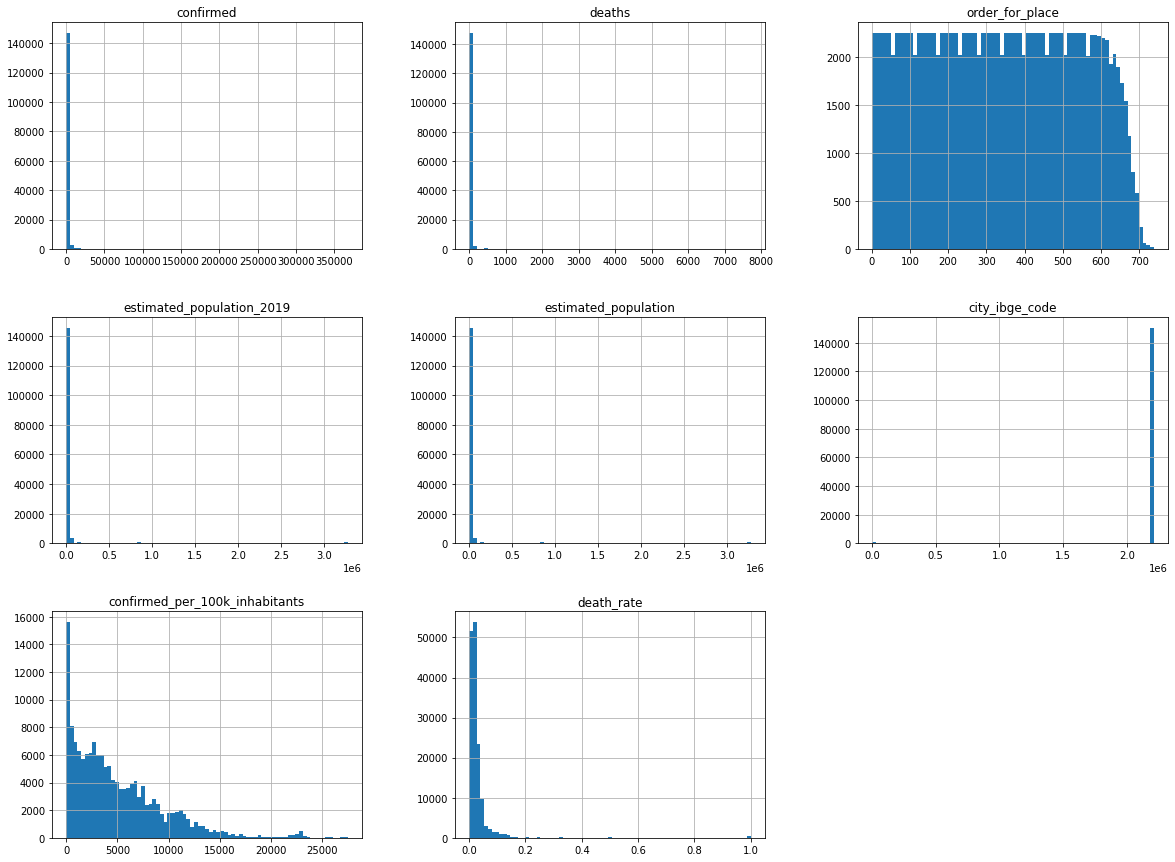

In [25]:
data_piaui.hist(bins=75, figsize=(20,15))
plt.show()

# Ponto #6

In [26]:
data_merge_piaui = pd.merge(cidades, df, on=['city', 'confirmed'])

In [27]:
data_merge_piaui.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 0 to 223
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date                            224 non-null    object 
 1   state                           224 non-null    object 
 2   city                            224 non-null    object 
 3   place_type                      224 non-null    object 
 4   confirmed                       224 non-null    int64  
 5   deaths                          224 non-null    int64  
 6   order_for_place                 224 non-null    int64  
 7   is_last                         224 non-null    bool   
 8   estimated_population_2019       224 non-null    float64
 9   estimated_population            224 non-null    float64
 10  city_ibge_code                  224 non-null    float64
 11  confirmed_per_100k_inhabitants  224 non-null    float64
 12  death_rate                      224 

In [28]:
data_merge_piaui

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,latitude,longitude
0,2022-03-26,PI,Acauã,city,228,2,658,True,7084.0,7102.0,2200053.0,3210.36328,0.0088,-8.330391,-40.984188
1,2022-03-26,PI,Agricolândia,city,829,10,650,True,5139.0,5131.0,2200103.0,16156.69460,0.0121,-5.796784,-42.660513
2,2022-03-26,PI,Alagoinha do Piauí,city,402,13,664,True,7651.0,7665.0,2200251.0,5244.61840,0.0323,-7.009095,-40.939675
3,2022-03-26,PI,Alegrete do Piauí,city,553,9,646,True,4915.0,4918.0,2200277.0,11244.40830,0.0163,-7.244014,-40.860230
4,2022-03-26,PI,Alto Longá,city,858,15,680,True,14304.0,14339.0,2200301.0,5983.68087,0.0175,-5.254905,-42.207239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2022-03-26,PI,Vila Nova do Piauí,city,349,3,689,True,2971.0,2952.0,2211605.0,11822.49322,0.0086,-7.142922,-40.937856
220,2022-03-26,PI,Várzea Branca,city,204,12,666,True,4947.0,4938.0,2211357.0,4131.22722,0.0588,-9.237188,-42.964378
221,2022-03-26,PI,Várzea Grande,city,561,1,697,True,4391.0,4386.0,2211407.0,12790.69767,0.0018,-6.546083,-42.248040
222,2022-03-26,PI,Wall Ferraz,city,335,3,642,True,4462.0,4471.0,2211704.0,7492.73093,0.0090,-7.233920,-41.911407


# Ponto #7

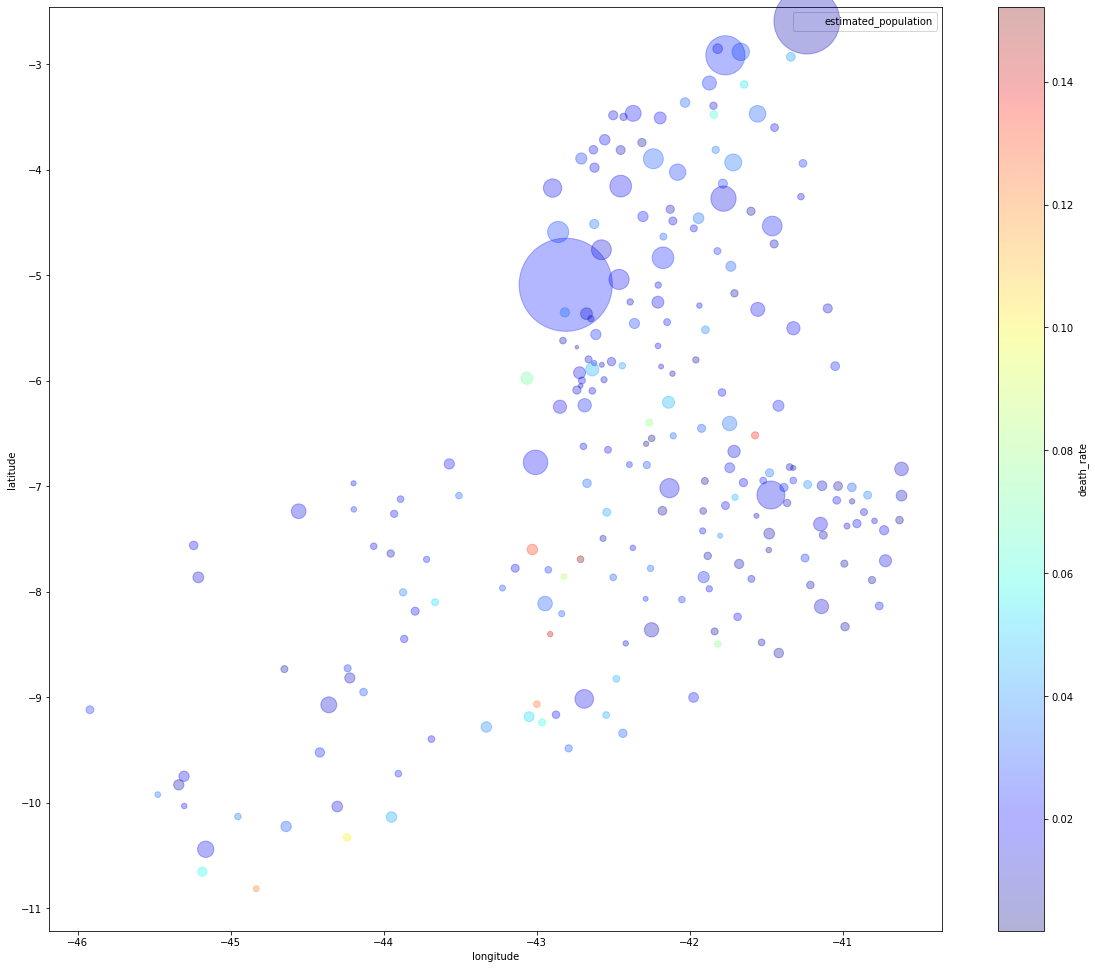

In [29]:
# data_merge_piaui.plot(kind='scatter', x='death_rate', y='confirmed_per_100k_inhabitants', alpha=0.1)
# plt.axis([0, 16, 0, 550])
data_merge_piaui.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3,
    s=data_merge_piaui['estimated_population']/100, label='estimated_population', figsize=(20,17),
    c='death_rate', cmap=plt.get_cmap('jet'), colorbar=True,
    sharex=False)
plt.legend()

# Ponto #8

In [30]:
corr_matrix = data_merge_piaui.corr()

In [31]:
corr_matrix

,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,latitude,longitude
confirmed,1.000000,0.996755,0.241685,NaN,0.996277,0.996275,0.106979,0.171124,-0.042708,0.114585,-0.014293
deaths,0.996755,1.000000,0.234446,NaN,0.997786,0.997791,0.106261,0.129136,-0.010849,0.116592,-0.015623
order_for_place,0.241685,0.234446,1.000000,NaN,0.246578,0.246476,0.020177,0.209144,-0.010620,0.208101,0.086273
is_last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
estimated_population_2019,0.996277,0.997786,0.246578,NaN,1.000000,1.000000,0.104996,0.118028,-0.022951,0.120086,-0.011606
estimated_population,0.996275,0.997791,0.246476,NaN,1.000000,1.000000,0.104970,0.117971,-0.022938,0.119995,-0.011660
city_ibge_code,0.106979,0.106261,0.020177,NaN,0.104996,0.104970,1.000000,-0.042297,0.093274,-0.064228,-0.007623
confirmed_per_100k_inhabitants,0.171124,0.129136,0.209144,NaN,0.118028,0.117971,-0.042297,1.000000,-0.488274,0.190116,-0.000171
death_rate,-0.042708,-0.010849,-0.010620,NaN,-0.022951,-0.022938,0.093274,-0.488274,1.000000,-0.168382,-0.169581
latitude,0.114585,0.116592,0.208101,NaN,0.120086,0.119995,-0.064228,0.190116,-0.168382,1.000000,0.427458


# Ponto #9

In [32]:
corr_matrix["death_rate"].sort_values(ascending=False)


death_rate                        1.000000
city_ibge_code                    0.093274
order_for_place                  -0.010620
deaths                           -0.010849
estimated_population             -0.022938
estimated_population_2019        -0.022951
confirmed                        -0.042708
latitude                         -0.168382
longitude                        -0.169581
confirmed_per_100k_inhabitants   -0.488274
is_last                                NaN
Name: death_rate, dtype: float64

<AxesSubplot:xlabel='death_rate', ylabel='confirmed_per_100k_inhabitants'>

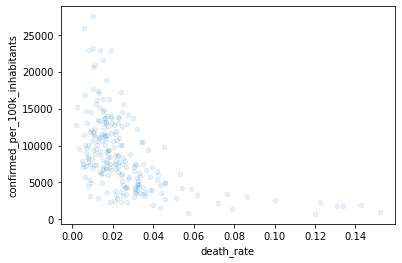

In [33]:
data_merge_piaui.plot(kind='scatter', x='death_rate', y='confirmed_per_100k_inhabitants', alpha=0.1)
# plt.axis([0, 16, 0, 550])